# Generating a CBN object

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-------------------------------

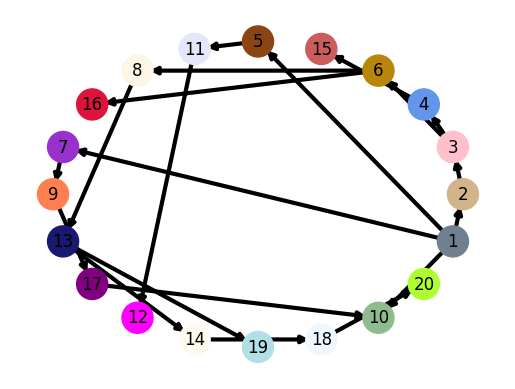

In [61]:
# external imports
import copy
import multiprocessing

# local imports
from classes.cbnetwork import CBN
from classes.globaltopology import GlobalTopology
from classes.localtemplates import LocalNetworkTemplate

# save the number of CPUs
NUM_CPUS = multiprocessing.cpu_count()

# pass the parameters
N_LOCAL_NETWORKS = 20
N_VARS_NETWORK = 20
N_OUTPUT_VARS = 2
N_INPUT_VARS = 2
V_TOPOLOGY = 2
N_MAX_CLAUSES = 2
N_MAX_LITERALS = 2

# GENERATE THE LOCAL NETWORK TEMPLATE
o_template = LocalNetworkTemplate(n_vars_network=N_VARS_NETWORK, n_input_variables=N_INPUT_VARS,
                                  n_output_variables=N_OUTPUT_VARS, n_max_of_clauses=N_MAX_CLAUSES,
                                  n_max_of_literals=N_MAX_LITERALS, v_topology=V_TOPOLOGY)

# GENERATE THE GLOBAL TOPOLOGY
o_global_topology = GlobalTopology.generate_sample_topology(v_topology=V_TOPOLOGY,
                                                            n_nodes=N_LOCAL_NETWORKS)

# generate aleatory CBN by topology
o_cbn = CBN.generate_cbn_from_template(v_topology=V_TOPOLOGY,
                                       n_local_networks=N_LOCAL_NETWORKS,
                                       n_vars_network=N_VARS_NETWORK,
                                       o_template=o_template,
                                       l_global_edges=o_global_topology.l_edges)

# Crear copias profundas del objeto original
o_cbn1 = copy.deepcopy(o_cbn) # Serial
o_cbn2 = copy.deepcopy(o_cbn) # Parallel Simple
o_cbn3 = copy.deepcopy(o_cbn) # Parallel with weights

# show the CBN Graph
o_cbn1.plot_topology()

# Find Local attractors

In [62]:
o_cbn1.find_local_attractors_sequential()

**************************************************
FIND LOCAL ATTRACTORS
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 1
--------------------------------------------------
Network: 1  Local Scene: None
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 2
--------------------------------------------------
Network: 2  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 2  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 3
--------------------------------------------------
Network: 3  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 3  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 4
--------------------------------------------------
Network: 4  Local Scene: 0
end find attractors
--------

In [63]:
o_cbn2.find_local_attractors_parallel(num_cpus=NUM_CPUS)

**************************************************
FIND LOCAL ATTRACTORS PARALLEL
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------





FIND ATTRACTORS FOR NETWORK:
FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:
FIND ATTRACTORS FOR NETWORK:
FIND ATTRACTORS FOR NETWORK:
FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK: FIND ATTRACTORS FOR NETWORK:  FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NET

In [64]:
o_cbn3.find_local_attractors_parallel_with_weigths(num_cpus=NUM_CPUS)

**************************************************
FIND LOCAL ATTRACTORS WEIGHTED BALANCED

Número de workers: 12
Distribución de tareas por bucket antes de la ejecución:
  Bucket 0: 1 tasks, total weight: 22
  Bucket 1: 2 tasks, total weight: 42
  Bucket 2: 2 tasks, total weight: 42
  Bucket 3: 2 tasks, total weight: 42
  Bucket 4: 2 tasks, total weight: 42
  Bucket 5: 2 tasks, total weight: 42
  Bucket 6: 2 tasks, total weight: 42
  Bucket 7: 2 tasks, total weight: 42
  Bucket 8: 2 tasks, total weight: 41
  Bucket 9: 1 tasks, total weight: 21
  Bucket 10: 1 tasks, total weight: 21
  Bucket 11: 1 tasks, total weight: 21
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [65]:
o_cbn1.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 6
Network: 1 - Scene: []
Attractors number: 6
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1']
['1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1']
['1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0']
['1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1']
['1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1']
['1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1']
['1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', 

In [66]:
o_cbn2.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 6
Network: 1 - Scene: []
Attractors number: 6
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1']
['1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1']
['1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0']
['1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1']
['1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1']
['1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1']
['1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', 

In [67]:
o_cbn3.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 6
Network: 1 - Scene: []
Attractors number: 6
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1']
['1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1']
['1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0']
['1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1']
['1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1']
['1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1']
['1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', 

In [68]:
len(o_cbn3.l_local_networks)

20

# Find compatible pairs

In [69]:
o_cbn1.find_compatible_pairs()

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS
END FIND ATTRACTOR PAIRS (Total pairs: 1068)


In [70]:
o_cbn2.find_compatible_pairs_parallel(num_cpus=NUM_CPUS)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL)
Tareas creadas: 20
Resultados obtenidos: 20
--------------------------------------------------
END FIND COMPATIBLE ATTRACTOR PAIRS (Total pairs: 1068)


In [71]:
o_cbn3.find_compatible_pairs_parallel_with_weights(num_cpus=NUM_CPUS)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL WITH WEIGHTS)

Number of CPUs: 12
Task distribution by bucket before execution:
  Bucket 0: 2 tasks, total weight: 36
  Bucket 1: 2 tasks, total weight: 36
  Bucket 2: 2 tasks, total weight: 36
  Bucket 3: 2 tasks, total weight: 36
  Bucket 4: 2 tasks, total weight: 28
  Bucket 5: 2 tasks, total weight: 28
  Bucket 6: 2 tasks, total weight: 28
  Bucket 7: 2 tasks, total weight: 28
  Bucket 8: 1 tasks, total weight: 18
  Bucket 9: 1 tasks, total weight: 18
  Bucket 10: 1 tasks, total weight: 18
  Bucket 11: 1 tasks, total weight: 18

Number of tasks processed: 20
END FIND COMPATIBLE ATTRACTOR PAIRS (Total unique pairs: 1068)


In [72]:
o_cbn1.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 3
--------------------------------------------------
Coupling Variable: 401, Scene: 0
--------------------------------------------------
Coupling Variable: 401, Scene: 1
(10, 34)
(15, 30)
(16, 29)
(15, 33)
(16, 32)
(18, 29)
(18, 32)
(17, 30)
(17, 33)
(8, 30)
(19, 30)
(9, 29)
(8, 33)
(10, 30)
(9, 32)
(11, 29)
(17, 34)
(10, 33)
(19, 33)
(11, 32)
(19, 34)
(15, 32)
(11, 33)
(15, 29)
(16, 31)
(16, 34)
(18, 31)
(19, 31)
(18, 34)
(11, 30)
(17, 29)
(9, 31)
(8, 29)
(17, 32)
(10, 32)
(9, 34)
(8, 32)
(10, 29)
(11, 31)
(19, 29)
(11, 34)
(19, 32)
(16, 30)
(16, 33)
(15, 31)
(18, 30)
(15, 34)
(18, 33)
(17, 31)
(9, 33)
(8, 31)
(9, 30)
(8, 34)
(10, 31)
--------------------------------------------------
Edge: 3 -> 4
--------------------------------------------------
Coupling Variable: 402, Scene: 0
--------------------------------------------------
Coupling Variable: 402, Scene: 1
(30, 43)
(32, 46)
(30, 

In [73]:
o_cbn2.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 3
--------------------------------------------------
Coupling Variable: 401, Scene: 0
--------------------------------------------------
Coupling Variable: 401, Scene: 1
(8, 29)
(8, 30)
(8, 31)
(8, 32)
(8, 33)
(8, 34)
(9, 29)
(9, 30)
(9, 31)
(9, 32)
(9, 33)
(9, 34)
(10, 29)
(10, 30)
(10, 31)
(10, 32)
(10, 33)
(10, 34)
(11, 29)
(11, 30)
(11, 31)
(11, 32)
(11, 33)
(11, 34)
(15, 29)
(15, 30)
(15, 31)
(15, 32)
(15, 33)
(15, 34)
(16, 29)
(16, 30)
(16, 31)
(16, 32)
(16, 33)
(16, 34)
(17, 29)
(17, 30)
(17, 31)
(17, 32)
(17, 33)
(17, 34)
(18, 29)
(18, 30)
(18, 31)
(18, 32)
(18, 33)
(18, 34)
(19, 29)
(19, 30)
(19, 31)
(19, 32)
(19, 33)
(19, 34)
--------------------------------------------------
Edge: 3 -> 4
--------------------------------------------------
Coupling Variable: 402, Scene: 0
--------------------------------------------------
Coupling Variable: 402, Scene: 1
(22, 43)
(22, 44)
(22, 

In [74]:
o_cbn3.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 3
--------------------------------------------------
Coupling Variable: 401, Scene: 0
--------------------------------------------------
Coupling Variable: 401, Scene: 1
(10, 34)
(15, 30)
(16, 29)
(15, 33)
(16, 32)
(18, 29)
(18, 32)
(17, 30)
(17, 33)
(8, 30)
(19, 30)
(9, 29)
(8, 33)
(10, 30)
(9, 32)
(11, 29)
(17, 34)
(10, 33)
(19, 33)
(11, 32)
(19, 34)
(15, 32)
(11, 33)
(15, 29)
(16, 31)
(16, 34)
(18, 31)
(19, 31)
(18, 34)
(11, 30)
(17, 29)
(9, 31)
(8, 29)
(17, 32)
(10, 32)
(9, 34)
(8, 32)
(10, 29)
(11, 31)
(19, 29)
(11, 34)
(19, 32)
(16, 30)
(16, 33)
(15, 31)
(18, 30)
(15, 34)
(18, 33)
(17, 31)
(9, 33)
(8, 31)
(9, 30)
(8, 34)
(10, 31)
--------------------------------------------------
Edge: 3 -> 4
--------------------------------------------------
Coupling Variable: 402, Scene: 0
--------------------------------------------------
Coupling Variable: 402, Scene: 1
(30, 43)
(32, 46)
(30, 

# Mount stable attractor fields

In [75]:
o_cbn1.mount_stable_attractor_fields()

**************************************************
FIND ATTRACTOR FIELDS


KeyboardInterrupt: 

In [56]:
o_cbn2.mount_stable_attractor_fields_parallel(num_cpus=NUM_CPUS)

**************************************************
MOUNT STABLE ATTRACTOR FIELDS (PARALLEL)

Procesando arista 2 con 5 pares base
Base actualizada: 5 pares

Procesando arista 4 con 5 pares base
Base actualizada: 5 pares

Procesando arista 5 con 5 pares base
Base actualizada: 5 pares

Procesando arista 7 con 5 pares base
Base actualizada: 2 pares

Procesando arista 8 con 2 pares base
Base actualizada: 1 pares

Procesando arista 9 con 1 pares base
Base actualizada: 1 pares

Procesando arista 10 con 1 pares base
Base actualizada: 1 pares

Procesando arista 3 con 1 pares base
Base actualizada: 1 pares

Procesando arista 6 con 1 pares base
Base actualizada: 1 pares
--------------------------------------------------
END MOUNT STABLE ATTRACTOR FIELDS (PARALLEL)


In [57]:
o_cbn3.mount_stable_attractor_fields_parallel_chunks()

**************************************************
MOUNT STABLE ATTRACTOR FIELDS (PARALLEL CHUNKS)

Processing edge 2 with 5 base pairs; chunk size: 1
  Chunk 0: 1 pairs
  Chunk 1: 1 pairs
  Chunk 2: 1 pairs
  Chunk 3: 1 pairs
  Chunk 4: 1 pairs
Updated base: 5 pairs

Processing edge 4 with 5 base pairs; chunk size: 1
  Chunk 0: 1 pairs
  Chunk 1: 1 pairs
  Chunk 2: 1 pairs
  Chunk 3: 1 pairs
  Chunk 4: 1 pairs
Updated base: 5 pairs

Processing edge 5 with 5 base pairs; chunk size: 1
  Chunk 0: 1 pairs
  Chunk 1: 1 pairs
  Chunk 2: 1 pairs
  Chunk 3: 1 pairs
  Chunk 4: 1 pairs
Updated base: 5 pairs

Processing edge 7 with 5 base pairs; chunk size: 1
  Chunk 0: 1 pairs
  Chunk 1: 1 pairs
  Chunk 2: 1 pairs
  Chunk 3: 1 pairs
  Chunk 4: 1 pairs
Updated base: 2 pairs

Processing edge 8 with 2 base pairs; chunk size: 1
  Chunk 0: 1 pairs
  Chunk 1: 1 pairs
Updated base: 1 pairs

Processing edge 9 with 1 base pairs; chunk size: 1
  Chunk 0: 1 pairs
Updated base: 1 pairs

Processing edge 10 

In [58]:
o_cbn1.show_attractor_fields()

LIST OF ATTRACTOR FIELDS
1 -> [1, 6, 9, 12, 15, 18, 21, 24, 27, 30]
Number of attractor fields found: 1


In [59]:
o_cbn2.show_attractor_fields()

LIST OF ATTRACTOR FIELDS
1 -> [1, 6, 9, 12, 15, 18, 21, 24, 27, 30]
Number of attractor fields found: 1


In [60]:
o_cbn3.show_attractor_fields()

LIST OF ATTRACTOR FIELDS
1 -> [6, 15, 27, 18, 24, 1, 9, 12, 21, 30]
Number of attractor fields found: 1
